In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import classification_report
from sklearn.metrics import roc_auc_score
import seaborn as sns
from scipy.stats import pearsonr

import plotly.graph_objects as go
from sklearn.datasets import make_moons


In [4]:
df = pd.read_csv('cleanData1.csv')


In [5]:
df[0:10]

,PIDMTERM,TERM,1st_College_Semester_GPA,HighSchool,SARADAP_PIDM,GENDER,AGE,MILES_FROM_TTU,APPDT,Hours_Transferred_In,...,TN_Geographic_Divisions,MAJOR,COLLEGE,CLASS,SEGMENT,COLLEGES1,MAJORS1,Spring_1_Retention,College_Change,Major_Change
0,1.636620e+11,201980,2.00,Cookeville High School,163662,F,28,0.98,43641,0.0,...,Middle,GHS,IP,FR,2019,IP,GHS,0,0,0
1,1.871450e+11,201980,2.67,Cherokee High School,187145,M,26,0.98,43494,0.0,...,Middle,CSC,EN,FR,2019,EN,CSC,0,0,0
2,2.022230e+11,201980,2.45,White County High School,202223,M,21,15.60,43343,0.0,...,Middle,CSC,EN,FR,2019,EN,CSC,1,0,0
3,2.155820e+11,201980,2.60,Anderson County High School,215582,M,22,79.95,43386,9.0,...,East,BIOL,AS,FR,2019,AS,BIOL,1,0,0
4,2.216790e+11,201980,1.50,Cookeville High School,221679,M,25,2.23,43392,0.0,...,Middle,BMGT,BA,FR,2019,BA,MKT,1,0,1
5,2.335520e+11,201980,0.00,Livingston Academy,233552,M,24,26.79,43430,0.0,...,Middle,ENG,AS,FR,2019,AS,ENG,0,0,0
6,2.355300e+11,201980,4.00,Moore County High School,235530,F,21,77.77,43320,7.0,...,Middle,CE,EN,FR,2019,EN,CE,1,0,0
7,2.419430e+11,201980,2.93,Cumberland County High School,241943,M,21,31.77,43382,0.0,...,East,CSC,EN,FR,2019,EN,CSC,1,0,0
8,2.421310e+11,201980,3.46,Gateway Christian Schools,242131,F,22,119.28,43350,6.0,...,Middle,PSY,ED,FR,2019,AH,HEC,1,1,1
9,2.421350e+11,201980,4.00,Henry County High School,242135,M,21,156.70,43314,8.0,...,West,CMPE,EN,SO,2019,EN,CMPE,1,0,0


In [6]:
pd.crosstab(df['Spring_1_Retention'], "Spring_1_Retention")

col_0,Spring_1_Retention
Spring_1_Retention,
0,715
1,6377


In [7]:
df.describe()

,PIDMTERM,TERM,1st_College_Semester_GPA,SARADAP_PIDM,AGE,MILES_FROM_TTU,Hours_Transferred_In,HS_GRAD_YEAR,HIGH_SCHOOL_GPA,ORIENTATION_SESSION,ACT_COMPOSITE,Pell_Eligible,First_Gen_Status,Appalachian_County,SEGMENT,Spring_1_Retention,College_Change,Major_Change
count,7.092000e+03,7092.000000,7092.000000,7092.000000,7092.000000,7092.000000,7092.000000,7092.000000,7092.000000,7092.000000,7092.000000,7092.000000,7092.000000,7092.000000,7092.000000,7092.000000,7092.000000,7092.000000
mean,3.230413e+11,202137.289904,2.853953,323041.342217,20.103497,78.138405,8.795639,2014.778765,3.796786,6.496898,23.830231,0.378737,0.263818,0.570502,2020.572899,0.899182,0.089679,0.134236
std,2.743491e+10,113.850513,1.102644,27434.915638,1.386725,126.680459,39.179452,107.160646,6.773257,4.575152,5.088521,0.485107,0.440733,0.495039,1.138505,0.301109,0.285741,0.340929
min,9.840520e+10,201980.000000,0.000000,98405.000000,16.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2019.000000,0.000000,0.000000,0.000000
25%,3.009492e+11,202080.000000,2.420000,300949.250000,19.000000,28.770000,0.000000,2019.000000,3.440000,3.000000,21.000000,0.000000,0.000000,0.000000,2020.000000,1.000000,0.000000,0.000000
50%,3.258655e+11,202180.000000,3.190000,325865.500000,20.000000,61.365000,0.000000,2021.000000,3.820000,6.000000,24.000000,0.000000,0.000000,1.000000,2021.000000,1.000000,0.000000,0.000000
75%,3.476722e+11,202280.000000,3.710000,347672.250000,21.000000,81.620000,10.000000,2022.000000,4.000000,9.000000,27.000000,1.000000,1.000000,1.000000,2022.000000,1.000000,0.000000,0.000000
max,3.731140e+11,202280.000000,4.000000,373114.000000,42.000000,3230.900000,1753.500000,2023.000000,518.000000,25.000000,36.000000,1.000000,1.000000,1.000000,2022.000000,1.000000,1.000000,1.000000


In [8]:
df.isnull().sum()

PIDMTERM                    0
TERM                        0
1st_College_Semester_GPA    0
HighSchool                  0
SARADAP_PIDM                0
GENDER                      0
AGE                         0
MILES_FROM_TTU              0
APPDT                       0
Hours_Transferred_In        0
HS_GRAD_YEAR                0
HIGH_SCHOOL_GPA             0
COLLEGE_CODE_DESC           0
MAJOR_DESC                  0
HOUSING                     0
ORIENTATION_SESSION         0
ORIENTATION_COMPLETED       0
ACT_COMPOSITE               0
Ethnicity                   0
INOUTST_Desc                0
LOAD_Desc                   0
Program_Name                0
Pell_Eligible               0
First_Gen_Status            0
Appalachian_County          0
TN_Geographic_Divisions     0
MAJOR                       0
COLLEGE                     0
CLASS                       0
SEGMENT                     0
COLLEGES1                   0
MAJORS1                     0
Spring_1_Retention          0
College_Ch

(array([ 460.,  159.,  158.,  213.,  253.,  510.,  828.,  973., 1474.,
        2064.]),
 array([0. , 0.4, 0.8, 1.2, 1.6, 2. , 2.4, 2.8, 3.2, 3.6, 4. ]),
 <BarContainer object of 10 artists>)

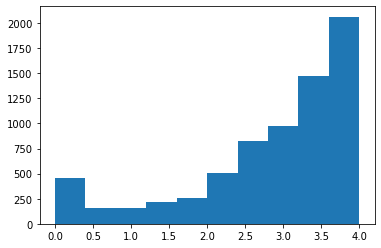

In [9]:
plt.hist(df['1st_College_Semester_GPA'])

(array([ 273., 2186., 1005.,  681.,    0.,  930.,  634.,  408.,  716.,
         259.]),
 array([0. , 0.8, 1.6, 2.4, 3.2, 4. , 4.8, 5.6, 6.4, 7.2, 8. ]),
 <BarContainer object of 10 artists>)

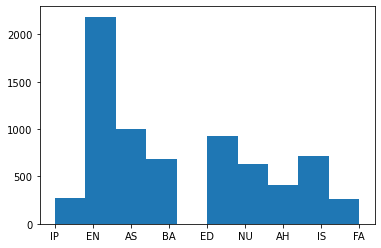

In [10]:
plt.hist(df['COLLEGE'])

(array([1460., 2056.,  911.,  385.,  733.,  205.,  226.,  305.,   63.,
         748.]),
 array([ 0. ,  5.9, 11.8, 17.7, 23.6, 29.5, 35.4, 41.3, 47.2, 53.1, 59. ]),
 <BarContainer object of 10 artists>)

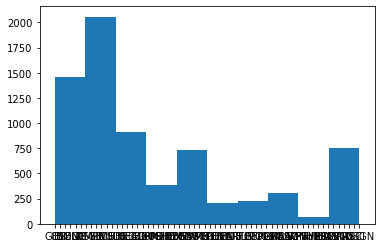

In [11]:
plt.hist(df['MAJOR'])

In [12]:
#plt.bar(df['MAJOR'], df['Spring_1_Retention'])
#plt.title("Bar Chart")
  
#plt.xlabel('MAJOR')
#plt.ylabel('Spring_1_Retention')

#plt.show()

In [13]:
# Scatter plot
#plt.scatter(tips['total_bill'], tips['tip'])
  
# Adding Title to the Plot
#plt.title("Scatter Plot")
  
# Setting the X and Y labels
#plt.xlabel('Total Bill')
#plt.ylabel('Tip')
  
#plt.show()


In [14]:
pd.crosstab(df['GENDER'],df['GENDER'])

GENDER,0,F,M,N
GENDER,,,,
0,11,0,0,0
F,0,3188,0,0
M,0,0,3880,0
N,0,0,0,13


In [15]:
#Dummies for Gender. 
df_laterality = pd.get_dummies(df, prefix='', prefix_sep='', columns=['GENDER'])
print(df_laterality)


          PIDMTERM    TERM  1st_College_Semester_GPA  \
0     1.636620e+11  201980                      2.00   
1     1.871450e+11  201980                      2.67   
2     2.022230e+11  201980                      2.45   
3     2.155820e+11  201980                      2.60   
4     2.216790e+11  201980                      1.50   
...            ...     ...                       ...   
7087  3.657290e+11  202280                      1.29   
7088  3.693660e+11  202280                      0.38   
7089  3.693800e+11  202280                      3.08   
7090  3.701950e+11  202280                      2.50   
7091  3.707270e+11  202280                      2.86   

                         HighSchool  SARADAP_PIDM  AGE  MILES_FROM_TTU  APPDT  \
0            Cookeville High School        163662   28            0.98  43641   
1              Cherokee High School        187145   26            0.98  43494   
2          White County High School        202223   21           15.60  43343   
3  

In [16]:
df_laterality = df_laterality.rename(columns={"M": "male", "F": "female"})


In [17]:
df_laterality = df_laterality.rename(columns={"0": "gender_0","N": "gender_N"})


In [18]:
df_laterality

,PIDMTERM,TERM,1st_College_Semester_GPA,HighSchool,SARADAP_PIDM,AGE,MILES_FROM_TTU,APPDT,Hours_Transferred_In,HS_GRAD_YEAR,...,SEGMENT,COLLEGES1,MAJORS1,Spring_1_Retention,College_Change,Major_Change,gender_0,female,male,gender_N
0,1.636620e+11,201980,2.00,Cookeville High School,163662,28,0.98,43641,0.0,2012,...,2019,IP,GHS,0,0,0,0,1,0,0
1,1.871450e+11,201980,2.67,Cherokee High School,187145,26,0.98,43494,0.0,2014,...,2019,EN,CSC,0,0,0,0,0,1,0
2,2.022230e+11,201980,2.45,White County High School,202223,21,15.60,43343,0.0,2018,...,2019,EN,CSC,1,0,0,0,0,1,0
3,2.155820e+11,201980,2.60,Anderson County High School,215582,22,79.95,43386,9.0,2019,...,2019,AS,BIOL,1,0,0,0,0,1,0
4,2.216790e+11,201980,1.50,Cookeville High School,221679,25,2.23,43392,0.0,2015,...,2019,BA,MKT,1,0,1,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7087,3.657290e+11,202280,1.29,Punjab School Education Board,365729,20,0.00,44617,0.0,2018,...,2022,BA,IBAC,1,0,0,0,0,1,0
7088,3.693660e+11,202280,0.38,St Ursula Eichi High School,369366,20,0.00,44656,0.0,2022,...,2022,AH,AGRI,1,0,0,0,0,1,0
7089,3.693800e+11,202280,3.08,Oakland High School,369380,18,0.00,44656,0.0,2022,...,2022,EN,ET,1,0,0,0,0,1,0
7090,3.701950e+11,202280,2.50,Rene Descartes High School,370195,17,0.00,44676,0.0,0,...,2022,IS,LIST,1,0,0,0,1,0,0


In [19]:
df_college = pd.get_dummies(df_laterality, prefix='college_of_', prefix_sep='', columns=['COLLEGE'])
print(df_college)


          PIDMTERM    TERM  1st_College_Semester_GPA  \
0     1.636620e+11  201980                      2.00   
1     1.871450e+11  201980                      2.67   
2     2.022230e+11  201980                      2.45   
3     2.155820e+11  201980                      2.60   
4     2.216790e+11  201980                      1.50   
...            ...     ...                       ...   
7087  3.657290e+11  202280                      1.29   
7088  3.693660e+11  202280                      0.38   
7089  3.693800e+11  202280                      3.08   
7090  3.701950e+11  202280                      2.50   
7091  3.707270e+11  202280                      2.86   

                         HighSchool  SARADAP_PIDM  AGE  MILES_FROM_TTU  APPDT  \
0            Cookeville High School        163662   28            0.98  43641   
1              Cherokee High School        187145   26            0.98  43494   
2          White County High School        202223   21           15.60  43343   
3  

(array([8.260e+02, 5.112e+03, 1.102e+03, 4.000e+01, 9.000e+00, 1.000e+00,
        1.000e+00, 0.000e+00, 0.000e+00, 1.000e+00]),
 array([16. , 18.6, 21.2, 23.8, 26.4, 29. , 31.6, 34.2, 36.8, 39.4, 42. ]),
 <BarContainer object of 10 artists>)

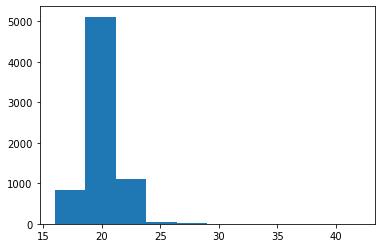

In [20]:
plt.hist(df['AGE'])

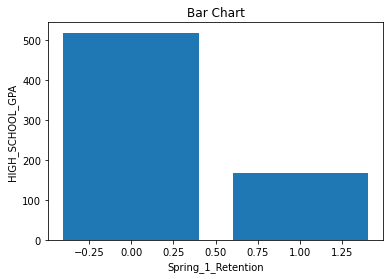

In [21]:
plt.bar(df['Spring_1_Retention'], df['HIGH_SCHOOL_GPA'])
  
plt.title("Bar Chart")
  
plt.xlabel('Spring_1_Retention')
plt.ylabel('HIGH_SCHOOL_GPA')

plt.show()

,PIDMTERM,TERM,1st_College_Semester_GPA,HighSchool,SARADAP_PIDM,GENDER,AGE,MILES_FROM_TTU,APPDT,Hours_Transferred_In,...,TN_Geographic_Divisions,MAJOR,COLLEGE,CLASS,SEGMENT,COLLEGES1,MAJORS1,Spring_1_Retention,College_Change,Major_Change
0,1.636620e+11,201980,2.00,Cookeville High School,163662,F,28,0.98,43641,0.0,...,Middle,GHS,IP,FR,2019,IP,GHS,0,0,0
1,1.871450e+11,201980,2.67,Cherokee High School,187145,M,26,0.98,43494,0.0,...,Middle,CSC,EN,FR,2019,EN,CSC,0,0,0
2,2.022230e+11,201980,2.45,White County High School,202223,M,21,15.60,43343,0.0,...,Middle,CSC,EN,FR,2019,EN,CSC,1,0,0
3,2.155820e+11,201980,2.60,Anderson County High School,215582,M,22,79.95,43386,9.0,...,East,BIOL,AS,FR,2019,AS,BIOL,1,0,0
4,2.216790e+11,201980,1.50,Cookeville High School,221679,M,25,2.23,43392,0.0,...,Middle,BMGT,BA,FR,2019,BA,MKT,1,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7087,3.657290e+11,202280,1.29,Punjab School Education Board,365729,M,20,0.00,44617,0.0,...,Middle,IBAC,BA,FR,2022,BA,IBAC,1,0,0
7088,3.693660e+11,202280,0.38,St Ursula Eichi High School,369366,M,20,0.00,44656,0.0,...,Middle,AGRI,AH,FR,2022,AH,AGRI,1,0,0
7089,3.693800e+11,202280,3.08,Oakland High School,369380,M,18,0.00,44656,0.0,...,Middle,ET,EN,FR,2022,EN,ET,1,0,0
7090,3.701950e+11,202280,2.50,Rene Descartes High School,370195,F,17,0.00,44676,0.0,...,Middle,LIST,IS,FR,2022,IS,LIST,1,0,0


In [24]:
df.describe()

,PIDMTERM,TERM,1st_College_Semester_GPA,SARADAP_PIDM,AGE,MILES_FROM_TTU,Hours_Transferred_In,HS_GRAD_YEAR,HIGH_SCHOOL_GPA,ORIENTATION_SESSION,ACT_COMPOSITE,Pell_Eligible,First_Gen_Status,Appalachian_County,SEGMENT,Spring_1_Retention,College_Change,Major_Change
count,7.092000e+03,7092.000000,7092.000000,7092.000000,7092.000000,7092.000000,7092.000000,7092.000000,7092.000000,7092.000000,7092.000000,7092.000000,7092.000000,7092.000000,7092.000000,7092.000000,7092.000000,7092.000000
mean,3.230413e+11,202137.289904,2.853953,323041.342217,20.103497,78.138405,8.795639,2014.778765,3.796786,6.496898,23.830231,0.378737,0.263818,0.570502,2020.572899,0.899182,0.089679,0.134236
std,2.743491e+10,113.850513,1.102644,27434.915638,1.386725,126.680459,39.179452,107.160646,6.773257,4.575152,5.088521,0.485107,0.440733,0.495039,1.138505,0.301109,0.285741,0.340929
min,9.840520e+10,201980.000000,0.000000,98405.000000,16.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2019.000000,0.000000,0.000000,0.000000
25%,3.009492e+11,202080.000000,2.420000,300949.250000,19.000000,28.770000,0.000000,2019.000000,3.440000,3.000000,21.000000,0.000000,0.000000,0.000000,2020.000000,1.000000,0.000000,0.000000
50%,3.258655e+11,202180.000000,3.190000,325865.500000,20.000000,61.365000,0.000000,2021.000000,3.820000,6.000000,24.000000,0.000000,0.000000,1.000000,2021.000000,1.000000,0.000000,0.000000
75%,3.476722e+11,202280.000000,3.710000,347672.250000,21.000000,81.620000,10.000000,2022.000000,4.000000,9.000000,27.000000,1.000000,1.000000,1.000000,2022.000000,1.000000,0.000000,0.000000
max,3.731140e+11,202280.000000,4.000000,373114.000000,42.000000,3230.900000,1753.500000,2023.000000,518.000000,25.000000,36.000000,1.000000,1.000000,1.000000,2022.000000,1.000000,1.000000,1.000000


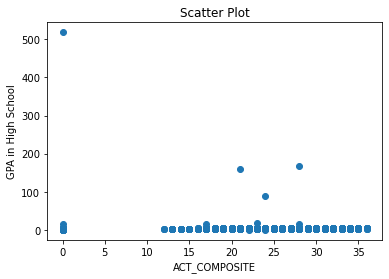

In [26]:
plt.scatter(df['ACT_COMPOSITE'], df['HIGH_SCHOOL_GPA'])
plt.title("Scatter Plot")
plt.xlabel('ACT_COMPOSITE')
plt.ylabel('GPA in High School')
plt.show()


(array([  69.,    0.,    0.,   43.,  437., 1663., 2398., 1202.,  997.,
         283.]),
 array([ 0. ,  3.6,  7.2, 10.8, 14.4, 18. , 21.6, 25.2, 28.8, 32.4, 36. ]),
 <BarContainer object of 10 artists>)

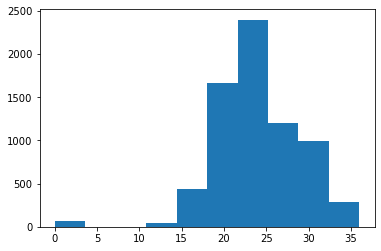

In [28]:
plt.hist(df['ACT_COMPOSITE'])

<AxesSubplot:ylabel='Density'>

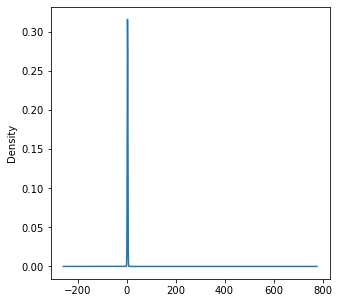

In [30]:
plt.figure(figsize = (5,5))
df['HIGH_SCHOOL_GPA'].plot(kind='density')

<AxesSubplot:>

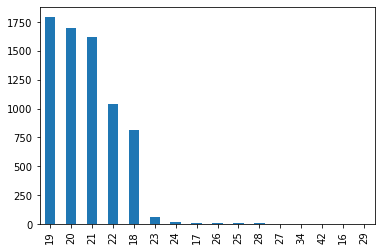

In [35]:
df['AGE'].value_counts().plot.bar()